## Capstone Project Report: Walmart Inventory Management and Sales Forecasting

 # Table of Contents
1. Problem Statement
2. Project Objective
3. Data Description
4. Data Preprocessing Steps and inspiration
5. Analysis and Insights
6. Choosing the Algorithm
7. Motivation and Reasons for Choosing the Algorithm
8. Model Evaluation and Techniques
9. Recommendations
10. .Conclusion

 ## Problem Statement
The problem statement revolves around inventory management and sales optimisation for multiple Walmart outlets across the country which are
facing issues in managing the inventory - to match the demand with respect to supply.

 ## Project Objective
This project aims to address the inventory management challenges facedby multiple outlets of a retail store chain like Walmart across the country.
By analyzing the provided dataset containing weekly sales information,this report identifies key insights using statistical analysis, exploratory data
analysis (EDA), outlier detection, and predictive modeling techniques.Additionally, it aims to provide actionable recommendations to optimize
inventory and forecast sales for the upcoming 12 week

 ## Data Description
The dataset, 'walmart.csv', comprises 6435 rows and 8 columns featuring
the following features:
1. Store: Store number
2. Date: Week of Sales
3. Weekly_Sales: Sales for the given store in that week
4. Holiday_Flag: Indicator for a holiday week
5. Temperature: Temperature on the day of the sale
6. Fuel_Price: Cost of fuel in the region
7. CPI: Consumer Price Index
8. Unemployment: Unemployment Rate

## DATA PREPROCESSING STEPS AND INSPIRATION

 ## 1) DATA CLEANING

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
##Loading Dataset
df=pd.read_csv("Walmart[1].csv")

In [10]:
df.shape

(6435, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [15]:
## Converting the data Type of Object column into Data Type
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)
df["Year"]=df["Date"].dt.year ##--Initializing Year Column 
df["Month"]=df["Date"].dt.month ##--Initializing Month Column 
df["Day"]=df["Date"].dt.day ##--Initializing Day Column 
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12


## 2)Data Visualization


Text(0.5, 1.0, 'Weekly_Sales')

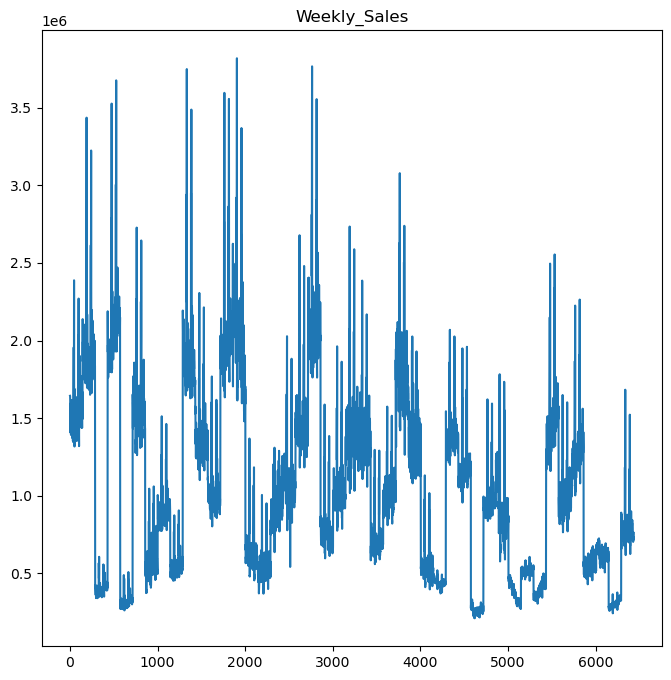

In [17]:
##Weekly_Sales
plt.figure(figsize=(8,8))
df["Weekly_Sales"].plot.line()
plt.title("Weekly_Sales")

 # Insights:

From the analysis of the sale for past Three years. it shows that the sales are Flucating and it does have a  trend or pattern 

   Year  Weekly_Sales
0  2010  2.288886e+09
1  2011  2.448200e+09
2  2012  2.000133e+09


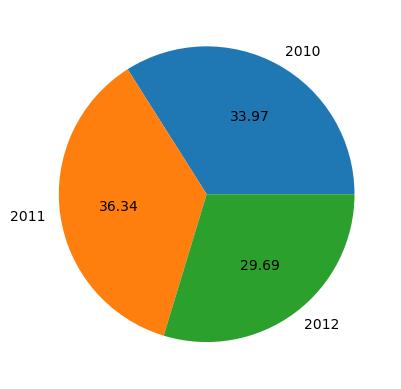

In [19]:
Year_wise_sales=df.groupby("Year")["Weekly_Sales"].sum().reset_index()
print(Year_wise_sales)
plt.pie(x="Weekly_Sales",labels="Year",autopct="%.2f",data=Year_wise_sales)
plt.show()

# Insights:

The above chart depicts the combined weekly sales for three year of all stores. From the analysis it shows that 2011 has more sales reported among the three consecutive years around 36% and 2012 has the least among the three

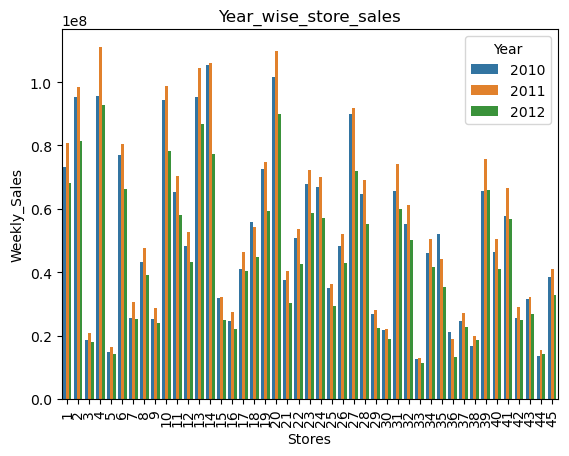

In [21]:
Year_wise_store_sales=df.groupby(["Store","Year"])["Weekly_Sales"].sum().reset_index()
sns.barplot(Year_wise_store_sales,x="Store",y="Weekly_Sales",hue="Year")
plt.xlabel("Stores")
plt.ylabel("Weekly_Sales")
plt.title("Year_wise_store_sales")
plt.xticks(rotation=90)
plt.show()

 # Insights:

Above Bar chart represents the weekly sales of each stores in the year of 2010,2011,2012. From the graph we can conclude that store number 20 has maximum sales in all three years.Mean while store 33 has low sales in three years 

## 3) Data Exploration- EDA

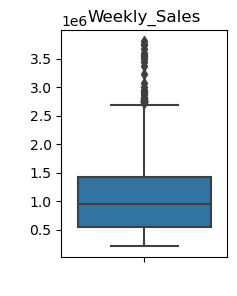

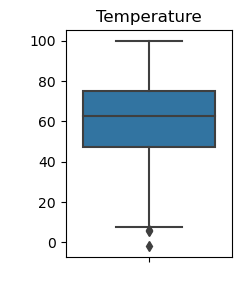

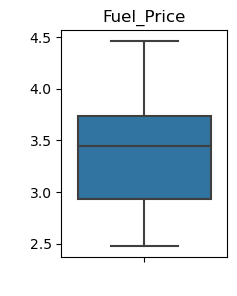

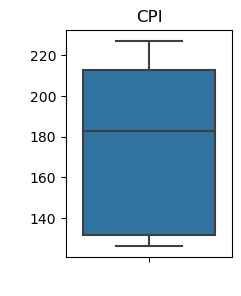

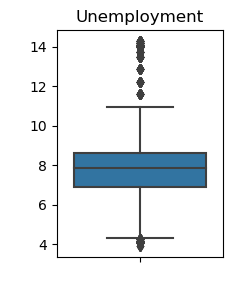

In [24]:
### Outliner Detection
columns=['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i,features in enumerate(columns,1):
    plt.figure(figsize=(15,10))
    plt.subplot(3,6,i)
    sns.boxplot(data=df,y=features)
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.title(features)

 # Insights:

We can clearly identify the presence of outliners in the columns Weekly_Sales,Temperature,Unemployment from above box plots. In Weekly Sales and Unemployment we can see the values more than Upper fence and Temperature has values more than the lower fence.

Axes(0.125,0.11;0.775x0.77)


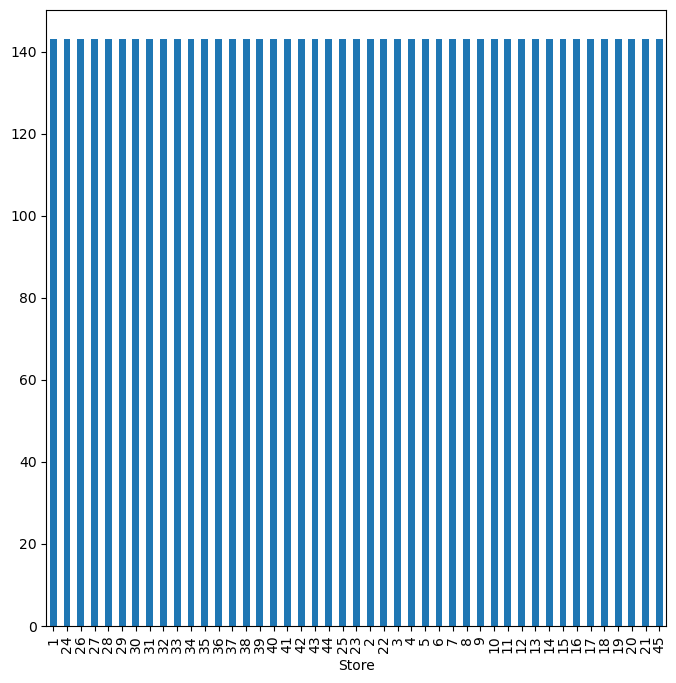

Axes(0.125,0.11;0.775x0.77)


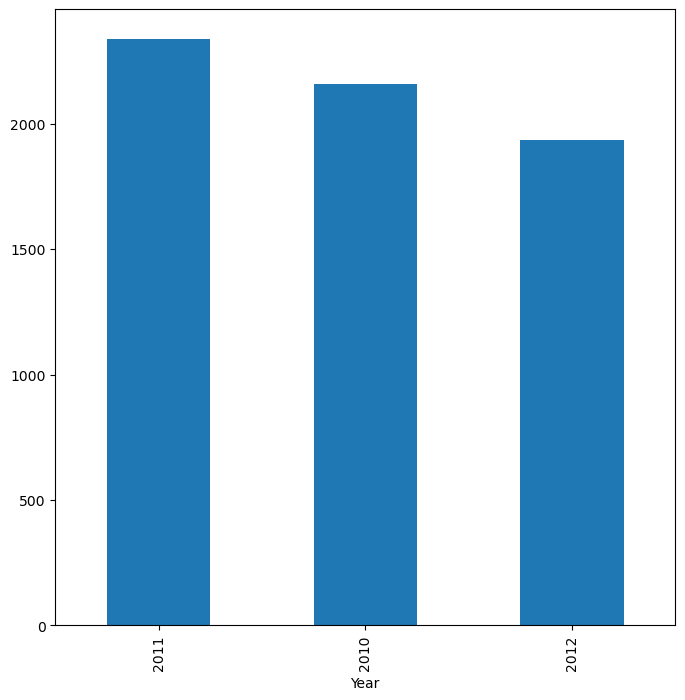

Axes(0.125,0.11;0.775x0.77)


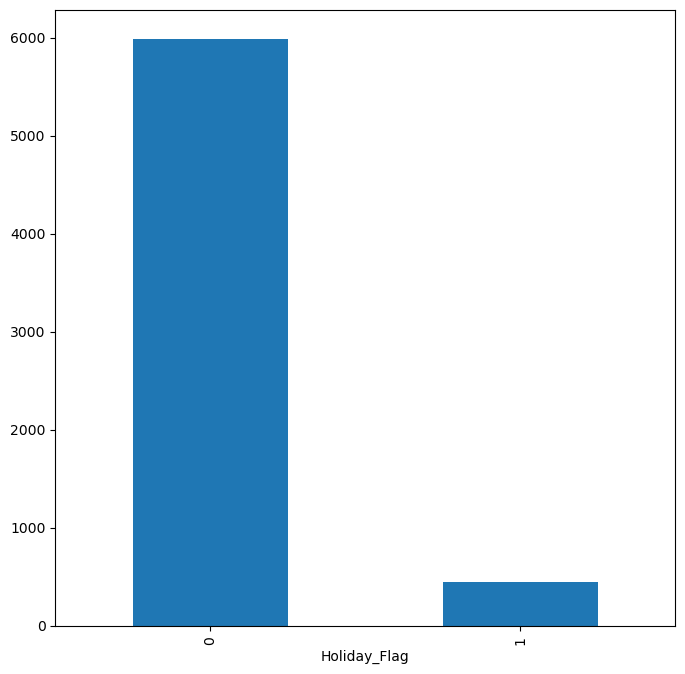

In [26]:
counts=['Store','Year','Holiday_Flag']
for features in counts:
    plt.figure(figsize=(8,8))
    print(df[features].value_counts().plot.bar())
    plt.show()

  ## Correlation

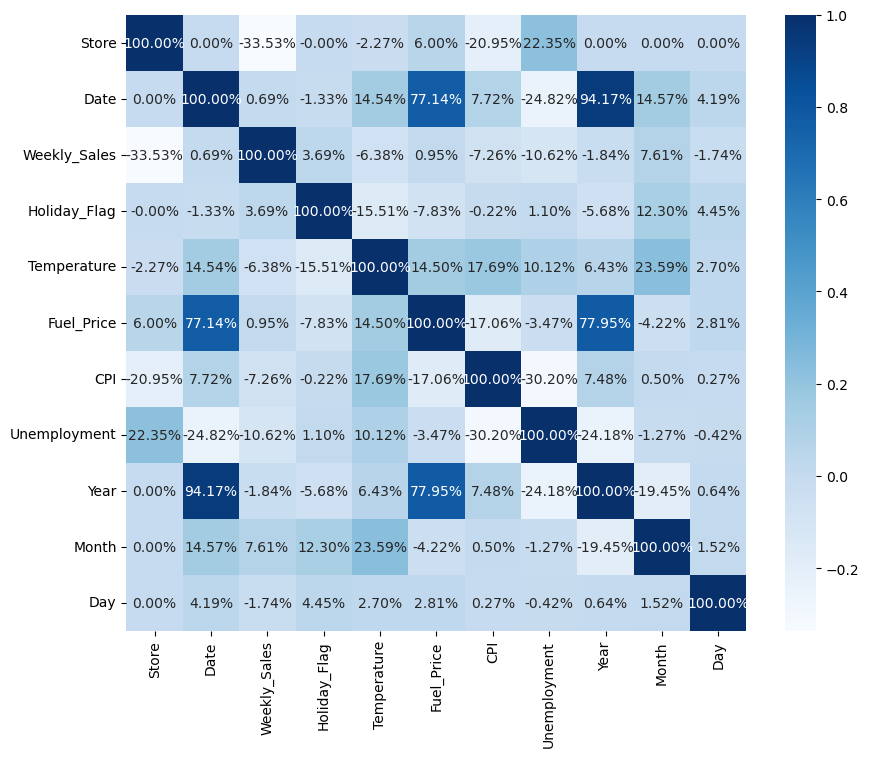

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2%",cmap="Blues")
plt.show()

 # Insights:

Correlation means the relation between the each columns . From the above heatmap it shows that weekly sales have been negatively correalated to temperature,fuel_price, Cpi and Unemployment

 # Analysis and Insights 

 ## A. Impact of Unemployment Rate on Weekly Sales

-0.10617608965795419


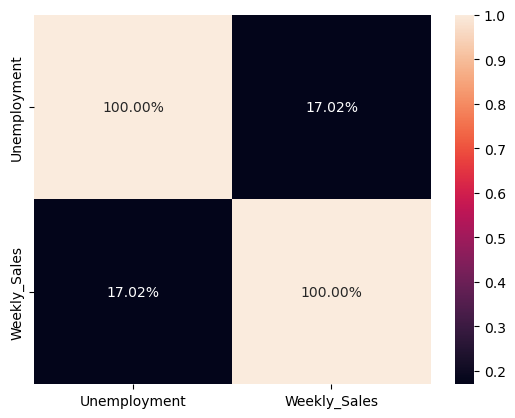

In [32]:
correlation=df["Weekly_Sales"].corr(df["Unemployment"])
print(correlation)
unemployment=df.groupby("Unemployment")["Weekly_Sales"].sum().reset_index()
sns.heatmap(unemployment.corr(),annot=True,fmt=".2%")
plt.show()

 # Insights:

Correlation shows the relation between two varibales. It can neagtive, positive or no correlation. From the correlation test between the weekly_sales and Unemployment rate results as -0.10617608965795419. And also the heatmap depicts that correlation is very low betweentwo variables. So we can conclude that  Unemployent is not making any changes in the weekly_sales of the Stores 

 # B. Seasonal Trends in Weekly Sales:

In [35]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)
df.set_index(df["Date"],inplace=True)
df_week=df.resample("W").mean()

stationarity 2.675979158986058e-07


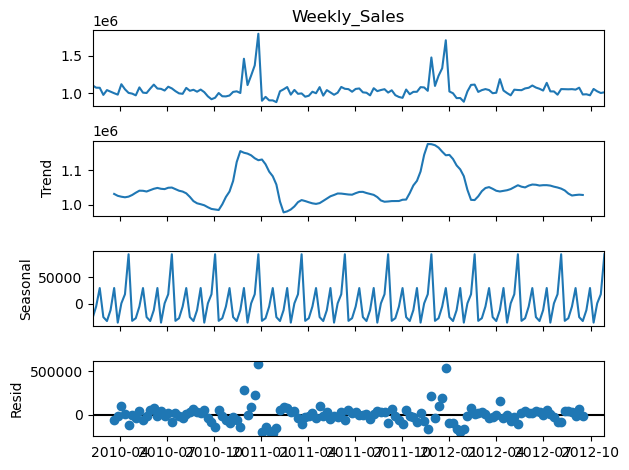

In [36]:
###Importing Libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
##Checking stationarity
result=adfuller(df_week["Weekly_Sales"])
print("stationarity",result[1])
new_decompose=seasonal_decompose(df_week["Weekly_Sales"],period=12)
new_decompose.plot();

 # Insights:

Seasonal decompose will be helpful to identify the seasonal pattern and trends.So,above the dataset has been resample as weekly and have perform the seasonal decompose. From the result graph we can see a seasonal trend on the weekly_sales.And from the adfuller test result it conclude that the data is stationary.

 # C. Effect of Temperature on Weekly Sales:

-0.06381001317946962


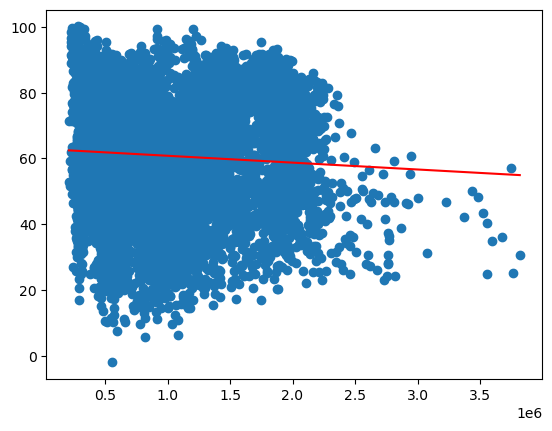

In [39]:
corr=df['Temperature'].corr(df['Weekly_Sales'])
print(corr)
plt.scatter(df['Weekly_Sales'],df['Temperature'])
plt.plot(np.unique(df['Weekly_Sales']), np.poly1d(np.polyfit(df['Weekly_Sales'],df['Temperature'] ,1))
         (np.unique(df['Weekly_Sales'])), color='red')
plt.show()

 # Insights:

Correlation will helps to understand the impact of one variable on another. As per the above correlation report show that , Temperature has no effect on the weekly sales since it has an correlation of -0.06381001317946962. And also Scatter plot depicts that all points has been scattered around the Best line fit. it conclude that there is no relation for Temperature and weekly_sales. 

 # D. Influence of Consumer Price Index (CPI) on Weekly Sales:

<Axes: xlabel='CPI'>

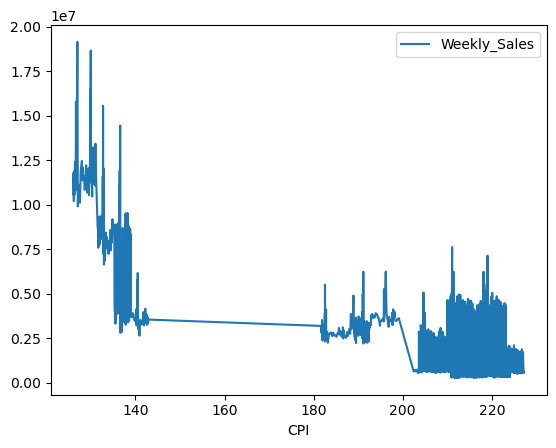

In [42]:
CPI_changes=df.groupby("CPI")["Weekly_Sales"].sum().reset_index()
CPI_changes.index=CPI_changes["CPI"]
del CPI_changes["CPI"]
CPI_changes.plot.line()

 # Insights 

The weekly_Sales and the CPI shows an negative relation.From the above line plot we can see that Changes in the weekly_sales have no signficant impact in the CPI. infact there has no CPI index inbetween 140 and 160.So CPI is not an factor for Forecasting sales. 

 # E. Top Performing Stores:

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


Text(0.5, 1.0, 'Top_Performing_stores')

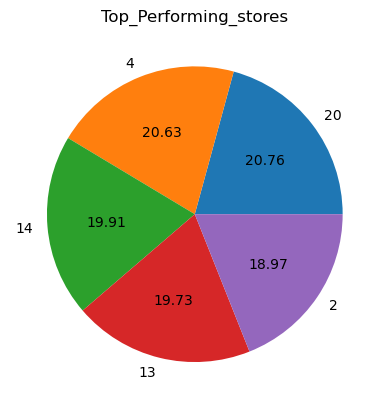

In [45]:
stores_weekly_sales=df.groupby("Store")['Weekly_Sales'].sum().reset_index()
Top_Performing_stores=stores_weekly_sales.sort_values(by='Weekly_Sales',ascending=False).head(5)
print(Top_Performing_stores)
plt.pie(x="Weekly_Sales",labels="Store",autopct="%.2f",data=Top_Performing_stores)
plt.xticks(rotation=90)
plt.title("Top_Performing_stores")

 # Insights:

From the detailed analysis of the stores and weekly sales by each store in the past three years. We have claerly identified that store_no 20 has been recorded the maximun sales fin all three years. it has been reported 3.013978e+08 weekly_ sales . And also Store 4,14,13,and 2 are top five performing stores among the 45 stores.

 # F. Worst Performing Store and Performance Gap

Worst_Performing_stores
Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64
Difference between the highest and lowest performing stores 264237570.49999997


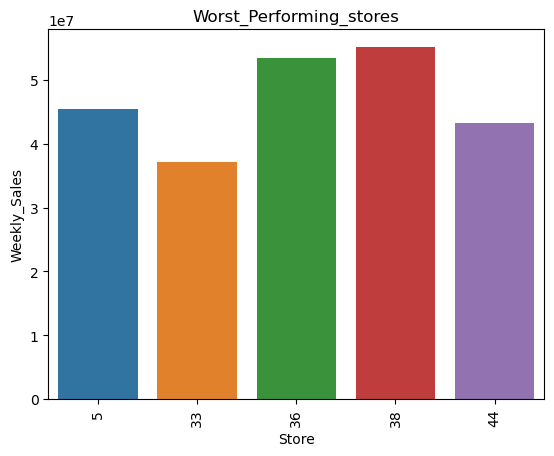

In [48]:
Worst_Performing_stores=stores_weekly_sales.sort_values(by='Weekly_Sales',ascending=True).head(5)
print("Worst_Performing_stores")
print(Worst_Performing_stores.iloc[0])
sns.barplot(y="Weekly_Sales",x="Store",data=Worst_Performing_stores)
plt.xticks(rotation=90)
plt.title("Worst_Performing_stores")
Difference=(Top_Performing_stores["Weekly_Sales"].iloc[0])-(Worst_Performing_stores["Weekly_Sales"].iloc[0])
print("Difference between the highest and lowest performing stores",Difference)


 # Insights:

The above report shows that thw store number 33 has recorded the minimum numbers of sales in the three years around 37160221.96. Where as the highest performng Store 20 has 3.013978e+08. Both are having an difference of 264237570.49999997  

 # Choosing the Algorithm

The choice of algorithm for a machine learning project is depends upon the type of problem we are trying to solve. Generally, supervised
learning algorithms are used for classification and regression problems, while unsupervised learning algorithms are used for clustering and dimensionality reduction tasks. And so different modelling algorithms were applied and the best one with high accuracy is selected for the given problem. For problems like sales forecasting productive modeling techniques can be used.

## Modelling_Technique

In [52]:
#Importing Libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [53]:
##Preprocessing Data
dummies=pd.get_dummies(df["Store"],prefix="Store")
df=pd.concat([dummies,df],axis=1)
x=df.drop(["Weekly_Sales","Date","Temperature","Unemployment"],axis=1)
y=df["Weekly_Sales"]         

## Splitting Data

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [56]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Intializing Model

In [58]:
def models(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    r2=r2_score(y_test,y_predict)
    print("r2_score: ",r2*100)
    mean_error=mean_squared_error(y_test,y_predict)
    rmse=np.sqrt(mean_error)
    error = rmse/y.mean()*100
    print("Error:", error)
    print("Accuracy:", 100-error)
    plt.scatter(x=y_test,y=y_predict)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test,y_predict,1))
         (np.unique(y_test)), color='red')
    plt.show()

## Evaluating the Model

In [60]:
##Importing Neccessary Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#MODEL_1-LINEAR REGRESSION

r2_score:  91.90319416376403
Error: 15.36774296620239
Accuracy: 84.63225703379761


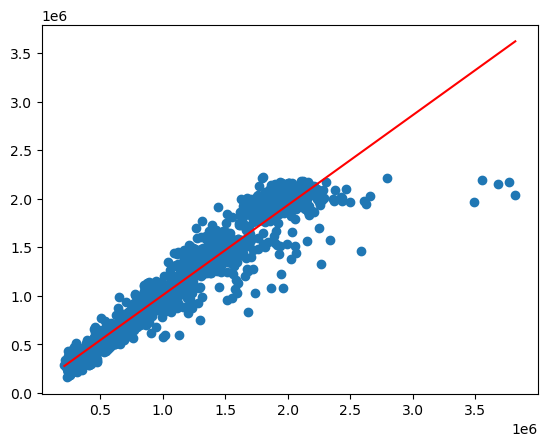

In [62]:
Model_1=models(LinearRegression())

MODEL_2-DECISIONTREE REGRESSION

r2_score:  93.3398377470858
Error: 13.937844996049062
Accuracy: 86.06215500395093


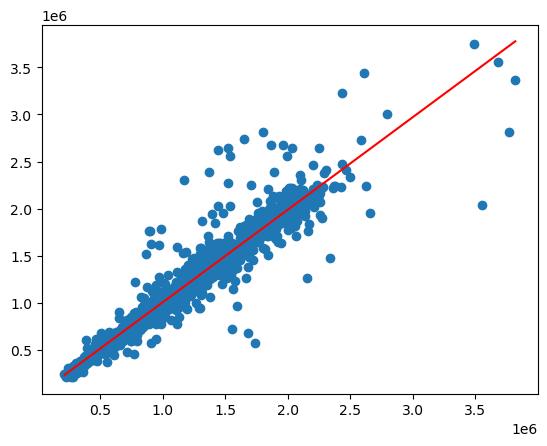

In [64]:
Model_2=models(DecisionTreeRegressor())

MODEL_3-RANDOM FOREST REGRESSOR

r2_score:  96.02259834606957
Error: 10.77092373092929
Accuracy: 89.2290762690707


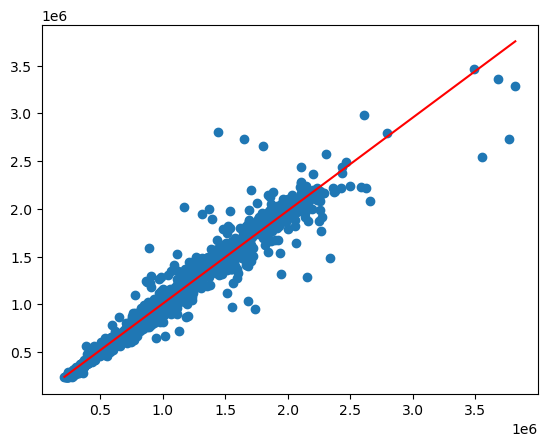

In [66]:
Model_3=models(RandomForestRegressor())

 ## Forecasting Using Time Series 

In [68]:
## Importing Libaries 
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
##df.set_index(df["Date"],inplace=True)

## Segregation of Stores

In [71]:
Stores={}
for i in df["Store"].unique():
    Stores[i]=df[(df["Store"]==i)]

## Model_1 - ARIMA_Model

In [73]:
def arima_model(Stores):
        Stores=Stores["Weekly_Sales"].diff().dropna()
        stores=pd.DataFrame(Stores)
        train_data=stores [:int(0.7*(len(stores)))]
        test_data = stores[int(0.7*(len(stores ))):]
        model_arima=auto_arima(train_data,seasonal=True,n_fits=100)
        models=model_arima.fit(train_data)
        models.summary()
        y_pred=models.predict(n_period=80)
        y_pred=pd.DataFrame(y_pred,index=test_data.index,columns=["Prediction"])
        plt.figure(figsize=(10,6))
        plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
        plt.plot(stores, label='Train')
        plt.plot(test_data, label='Test')
        plt.plot(y_pred, label='Prediction of ARIMA')
        plt.legend(loc='best')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Weekly Sales', fontsize=14)
        plt.show()

## Model_2 - SARIMAX_Model

In [75]:
def Sarimax_model(Stores):
        Stores=Stores["Weekly_Sales"].diff().dropna()
        stores=pd.DataFrame(Stores)
        train_data=stores [:int(0.7*(len(stores)))]
        test_data = stores[int(0.7*(len(stores ))):]
        model=SARIMAX(train_data,order=(3,0,2),seasonal_order=(3,0,2,7))
        model=model.fit() 
        y_pred = model.forecast(steps=80)
        plt.figure(figsize=(10,6))
        plt.title('Prediction of Weekly Sales Using SARIMAX', fontsize=20)
        plt.plot(train_data, label='Train')
        plt.plot(test_data, label='Test')
        plt.plot(y_pred, label='Prediction of SARIMAX')
        plt.legend(loc='best')
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Weekly Sales', fontsize=14)
        plt.show()

## Model_3 - ExponentialSmoothing_Model

In [77]:
def ExponentialSmoothing_model(Stores):
    Stores=Stores["Weekly_Sales"].diff().dropna()
    Stores=pd.DataFrame(Stores)
    train_data=Stores[:int(0.7*(len(Stores)))]
    test_data = Stores[int(0.7*(len(Stores))):]
    model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=20,seasonal='additive',
                                       trend='additive',damped_trend=True).fit() 
    y_pred = model_holt_winters.forecast(steps=80)
    plt.figure(figsize=(10,6))
    plt.title('Prediction of Weekly Sales Using ExponentialSmoothing', fontsize=20)
    plt.plot(train_data, label='Train')
    plt.plot(test_data, label='Test')
    plt.plot(y_pred, label='Prediction of ExponentialSmoothing')
    plt.legend(loc='best')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Weekly Sales', fontsize=14)
    plt.show()

## Evaluating the Model

 # Model-1- ARIMA Model

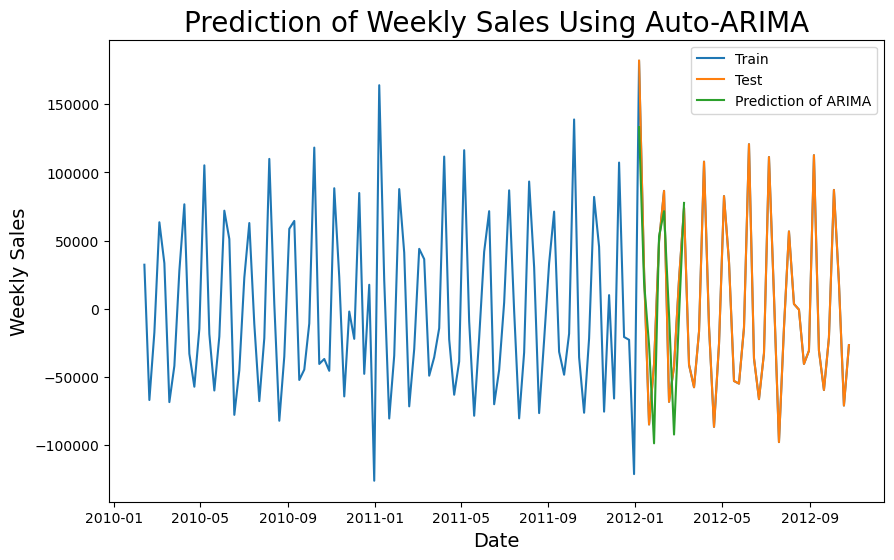

In [80]:
arima_model(Stores[42])

In [81]:
 # Model_2- SARIMAX Model

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


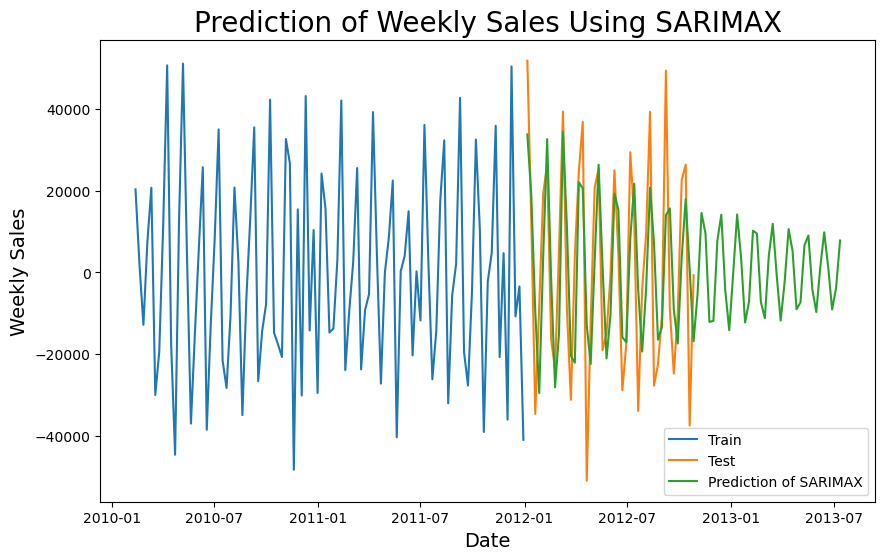

In [82]:
Sarimax_model(Stores[33])

 # Model-3- ExponentialSmoothing Model

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


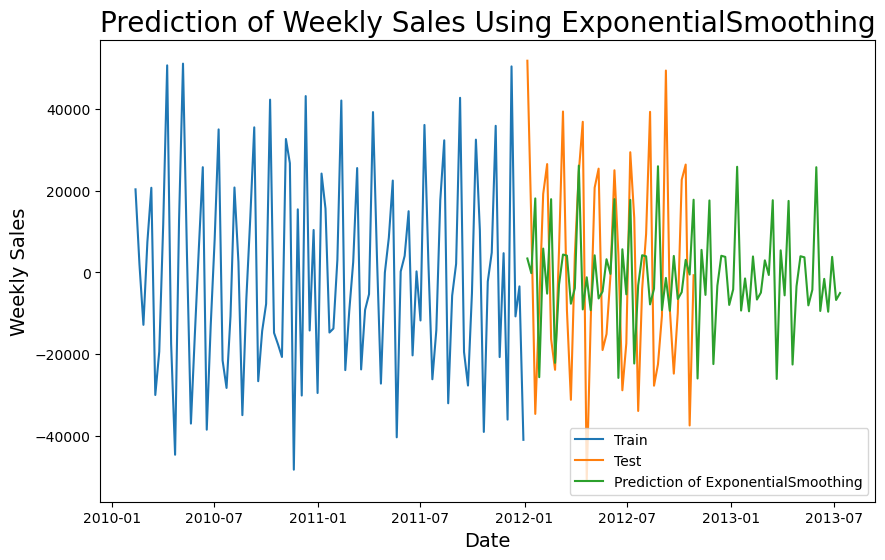

In [84]:
ExponentialSmoothing_model(Stores[33])

 # Motivation and Reasons for Choosing the Algorithm


The weekly_sales column is the variable we can considered  for Forecasting the sales. Since the Weekly_Sales is of the continuous variable,  regression method can be used to solve the Problem.  I have tried Mainly three Different models for the Dataset. Starting with base model Linear Regression, Decision tree regressor as well Random forest Regressor. Looking at the accuracy and R score of the model. It shows that Random forest shows an accuracy of 89 comapring other two and also have an R score of around 95. So Random Forest regressor is good for the dataset

## Model Evaluation and Techniques
The most accurate way to forecast sales for each store using machine learning is to use a time series forecasting model. This type of model takes
into account the historical sales data for each store and uses it to predict future sales. The model can be trained using a variety of techniques, such
as neural networks. Once the model is trained, it can be used to make predictions about future sales for each store. Additionally, the model can
be evaluated using a variety of metrics. Amd among the Times Series Model EXPONENTIALSMOOTHING is forecasting the sales for next 12 weeks accurately compared to ARIMA,SARIMAX models

At the same time, it is not possible to accurately forecast the sales for each store for the next 12 weeks using machine learning without additional
information. Machine learning algorithms require data to be able to make predictions. This data could include historical sales data, customer
demographics, store location, and other factors. Without this data, it is notpossible to accurately forecast sales for each store for the next 12 weeks.
10


## Recommendations
Based on the analysis and insights derived from the dataset, the following recommendations are proposed:

1. The sales for each store can be forecasted using Times series Exponetial smoothing model
2. And algorithms such as regression, decision trees, and neural networks need more variables like location,price etc to predict the sales.
3. These algorithms can be used to predict the sales for each store based
on historical data, such as sales figures from previous years,
customer demographics, and other factors.
4. The predictions can then be used to inform decisions about inventory,
pricing, and marketing strategies.
5. Additionally, the predictions can be used to identify trends and
opportunities for growth

## Conclusion
This project aimed to address inventory management challenges faced by Walmart outlets using comprehensive data analysis and predictive
modeling techniques. Walmart can use machine learning to forecast sales for each store. By leveraging historical sales data, Walmart can use
predictive analytics to identify patterns and trends in sales and use them to make accurate predictions about future sales. Walmart can also use
machine learning to identify factors that influence sales, such as weather,seasonality, and customer demographics. By incorporating these factors
into their forecasting models, Walmart can make more accurate predictions about future sales.